This takes the some available categorical features in the original wildfire dataset (fire start month and state) for some visualizations.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from matplotlib.pyplot import text
import calendar


Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


In [78]:
X = pd.read_pickle('wildfire_encoded_data.pkl')
y = pd.read_pickle('wildfire_encoded_labels.pkl')
#Grab more features from the final dataset.
X_1 = pd.read_pickle('final_dataset_1.pkl')

In [77]:
y_1 = X_1['TIME_TO_CONT']
X_1 = X_1.drop(columns=['TIME_TO_CONT'])

In [20]:
X_1.head()

,DISCOVERY_DATETIME,STATE,FIRE_YEAR,STAT_CAUSE_CODE,LATITUDE,LONGITUDE,FIRE_SIZE_CLASS
0,2,4.0,2005,9.0,40.036944,-121.005833,1
1,5,4.0,2004,1.0,38.933056,-120.404444,1
2,5,4.0,2004,5.0,38.984167,-120.735556,1
3,6,4.0,2004,1.0,38.559167,-119.913333,1
4,6,4.0,2004,1.0,38.559167,-119.933056,1


In [21]:
y.head()

0     22.00
1     22.25
2     21.45
3    132.00
4    128.00
Name: TIME_TO_CONT, dtype: float64

Now let's take a very basic, visual look at the distribution.

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 20);

In [23]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size = .2, random_state = 20);


In [24]:
y1_train

150737      2.066667
472884      0.000000
56259      77.350000
623123      0.916667
653476      0.000000
165721     62.000000
392124      1.050000
455056      1.500000
172373      2.000000
556353      0.000000
633046     21.916667
387868      1.566667
575493      0.000000
5524        3.200000
736527      0.550000
265030      2.000000
348932      0.833333
73555       1.500000
231382     18.300000
779877      3.400000
407668      0.700000
450778      0.600000
768240      0.500000
431062      1.833333
18614       2.000000
84650      51.400000
217432      0.683333
382005      0.883333
33412     814.000000
639733      1.716667
             ...    
217035      0.250000
257677      1.000000
645402     48.066667
170978      0.416667
185599      0.316667
405989      2.966667
422663      2.950000
398480      2.366667
191678      2.100000
686822      1.433333
429798      2.050000
174845      3.500000
427792      1.116667
635859      0.766667
11003      27.783333
91930       0.500000
677333      1

([<matplotlib.axis.XTick at 0x7fc53f613d30>,
 <a list of 13 Text xticklabel objects>)

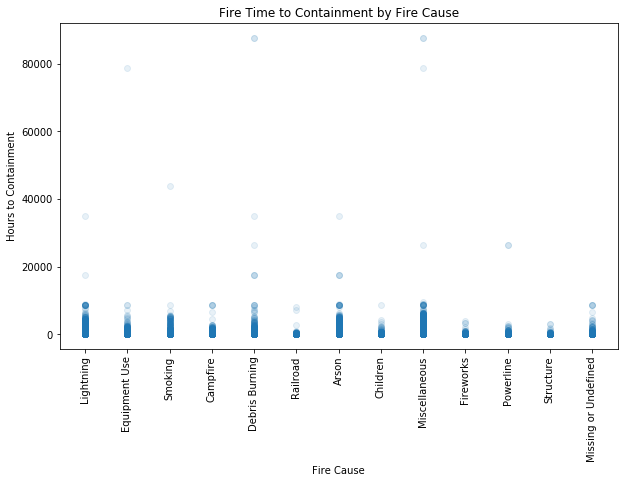

In [27]:
#Cause dict based off of the two columns for cause and cause desc:
#state_cause_dict = {9.0: 'Miscellaneous',
# 1.0: 'Lightning',
# 5.0: 'Debris Burning',
# 4.0: 'Campfire',
# 2.0: 'Equipment Use',
# 7.0: 'Arson',
# 8.0: 'Children',
# 6.0: 'Railroad',
# 3.0: 'Smoking',
# 11.0: 'Powerline',
# 12.0: 'Structure',
# 10.0: 'Fireworks',
# 13.0: 'Missing/Undefined'}
cause_list = ['Lightning', 'Equipment Use', 'Smoking', 'Campfire', 'Debris Burning',
              'Railroad', 'Arson', 'Children', 'Miscellaneous', 'Fireworks', 'Powerline',
             'Structure', 'Missing or Undefined']
plt.figure(figsize=(10,6));
X1_train_feat = np.array(X1_train['STAT_CAUSE_CODE']).reshape(-1,1)
plt.scatter(X1_train_feat, y1_train, alpha = 0.1)
plt.title("Fire Time to Containment by Fire Cause")
plt.xlabel("Fire Cause")
plt.ylabel('Hours to Containment')
plt.xticks(np.arange(1,14), cause_list, rotation=90)


([<matplotlib.axis.XTick at 0x7f83b1434cf8>,
 <a list of 12 Text xticklabel objects>)

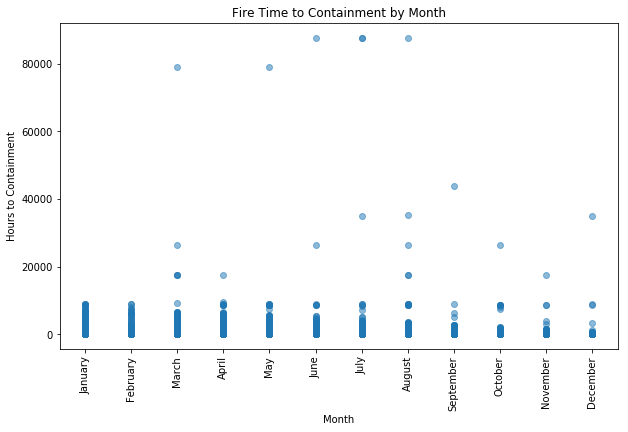

In [7]:
plt.figure(figsize=(10,6));
X_train_feat = np.array(X_train['DISCOVERY_DATETIME']).reshape(-1,1)
plt.scatter(X_train_feat, y_train, alpha = 0.5, label="Training")
plt.title("Fire Time to Containment by Month")
plt.xlabel("Month")
plt.ylabel('Hours to Containment')
plt.xticks(np.arange(1,13), calendar.month_name[1:13], rotation=90)



In [8]:
plt.figure(figsize=(16,8));
X_train_feat = np.array(X_train['STATE']).reshape(-1,1)
X_test_feat = np.array(X_test['STATE']).reshape(-1,1)
plt.scatter(X_train_feat, y_train, alpha=0.5, label="Training")
plt.title("Fire Time to Containment by U.S. State")
plt.xlabel("State")
plt.ylabel('Hours to Containment')
plt.xticks(np.arange(52), ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
        'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])


NameError: name 'rand_jitter' is not defined

<Figure size 1152x576 with 0 Axes>

In [128]:
X = pd.read_pickle('wildfire_area_encoded_data.pkl')
y = pd.read_pickle('wildfire_area_encoded_labels.pkl')

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 20);

In [130]:
X_train.head()

,DISCOVERY_DATETIME,STATE
1247730,7,NaN
236076,7,45.0
1405504,5,NaN
1340393,7,NaN
10099,4,5.0


([<matplotlib.axis.YTick at 0x7fcbb18035f8>,
 <a list of 7 Text yticklabel objects>)

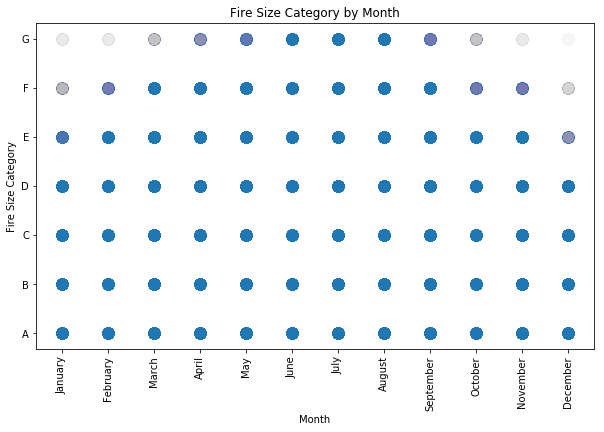

In [131]:
plt.figure(figsize=(10,6));
X_train_feat = np.array(X_train['DISCOVERY_DATETIME']).reshape(-1,1)
plt.scatter(X_train_feat, y_train, s=150, alpha=0.005, label="Training")
plt.title("Fire Size Category by Month")
plt.xlabel("Month")
plt.ylabel('Fire Size Category')
plt.xticks(np.arange(1,13), calendar.month_name[1:13], rotation=90)
plt.yticks(np.arange(1, 8), ['A', 'B', 'C', 'D', 'E', 'F', 'G'])


In [132]:
np.array(y_train)

array([2, 2, 2, ..., 1, 1, 1])

<Figure size 720x720 with 0 Axes>

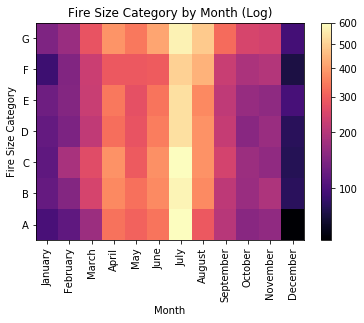

In [82]:
plt.figure(figsize=(10,10));
fig, ax = plt.subplots()
plt.set_cmap('magma')
import matplotlib.colors as mcolors
gamma = 0.5
X_train_feat = np.array(X_train['DISCOVERY_DATETIME']).reshape(-1,1)

h = plt.hist2d(X_train_feat.transpose()[0], np.array(y_train),  norm=mcolors.PowerNorm(gamma), bins=[np.arange(1, 14), np.arange(1,9)])

plt.title("Fire Size Category by Month (Log)")
plt.xlabel("Month")
plt.ylabel('Fire Size Category')
plt.xticks(np.arange(1,13) + .5, calendar.month_name[1:13], rotation=90)
plt.yticks(np.arange(1, 8) + .5, ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
fig.colorbar(h[3], ax=ax)

<Figure size 720x720 with 0 Axes>

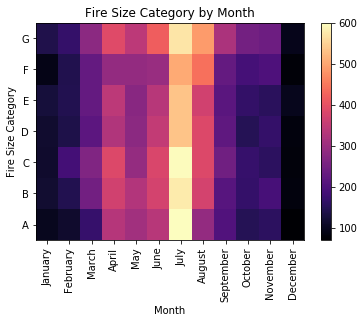

In [85]:
plt.figure(figsize=(10,10));
fig, ax = plt.subplots()
plt.set_cmap('magma')
import matplotlib.colors as mcolors

h = plt.hist2d(X_train_feat.transpose()[0], np.array(y_train), bins=[np.arange(1, 14), np.arange(1,9)])

plt.title("Fire Size Category by Month")
plt.xlabel("Month")
plt.ylabel('Fire Size Category')
plt.xticks(np.arange(1,13) + .5, calendar.month_name[1:13], rotation=90)
plt.yticks(np.arange(1, 8) + .5, ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
fig.colorbar(h[3], ax=ax)

In [ ]:
X_tr

([<matplotlib.axis.XTick at 0x7fcbad97d1d0>,
 <a list of 52 Text xticklabel objects>)

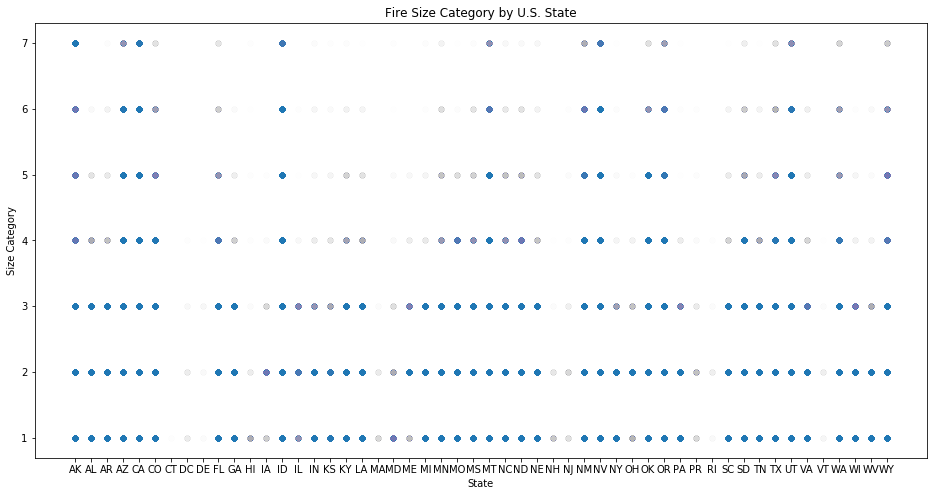

In [68]:
plt.figure(figsize=(16,8));
X_train_feat = np.array(X_train['STATE']).reshape(-1,1)
plt.scatter(X_train_feat, y_train, alpha=0.005, label="Training")
plt.title("Fire Size Category by U.S. State")
plt.xlabel("State")
plt.ylabel('Size Category')
plt.xticks(np.arange(52), ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
        'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

In [108]:
#We do have to remove nans for this visualization

X_train_feat = np.array(X_train['STATE']).reshape(-1,1)
xp = np.logical_not(np.isnan(X_train_feat))
X_train_feat = X_train_feat[xp]
y_train = np.array(y_train).transpose()


In [109]:
y_train = y_train.reshape(1,-1)

In [113]:
y_train = y_train[xp.transpose()]

In [117]:
len(X_train_feat)

347722

In [118]:
len(y_train)

347722

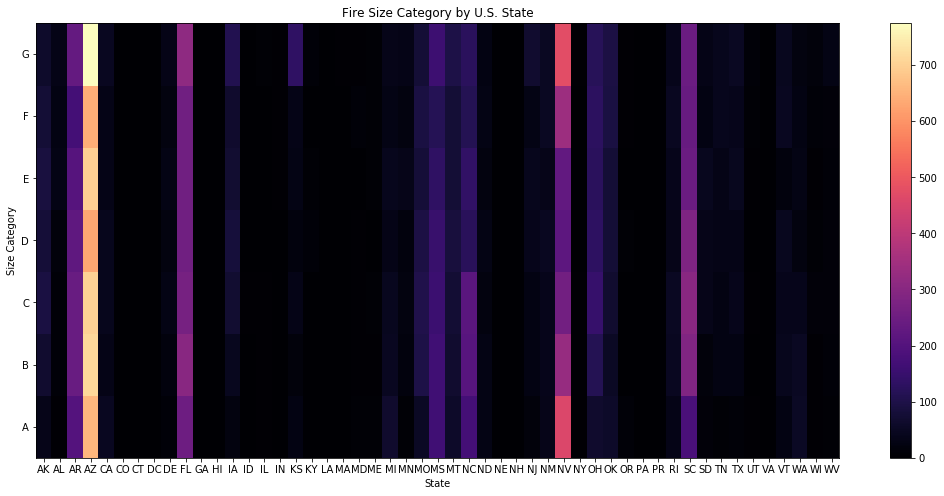

In [88]:
fig, ax = plt.subplots(figsize=(18,8))
X_train_feat = np.array(X_train['STATE']).reshape(-1,1)
xp = np.logical_not(np.isnan(X_train_feat))
X_train_feat = X_train_feat[xp]
y_train = np.array(y_train).transpose()
h = plt.hist2d(X_train_feat, y_train, bins=[np.arange(1, 53), np.arange(1,9)])

plt.title("Fire Size Category by U.S. State")
plt.xlabel("State")
plt.ylabel('Size Category')
plt.xticks(np.arange(1,52) + .5, ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
        'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])
plt.yticks(np.arange(1, 8) + .5, ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

fig.colorbar(h[3], ax=ax)

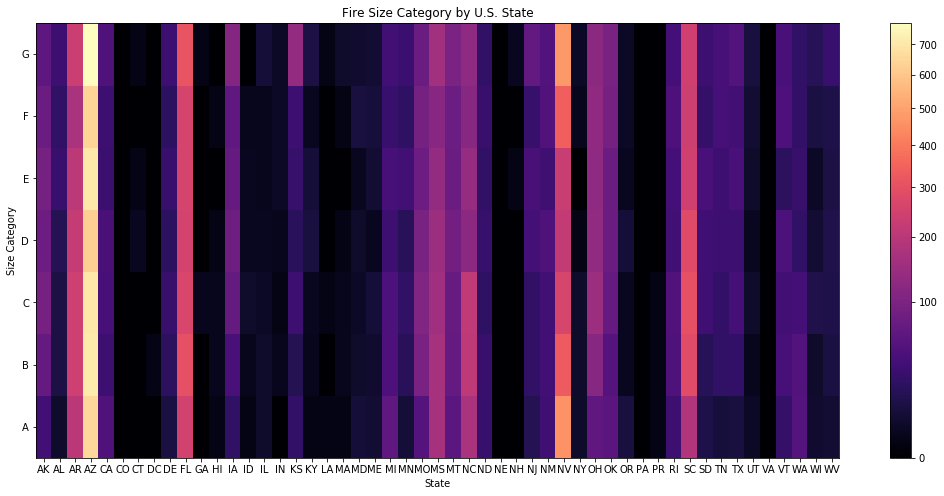

In [92]:
gamma = 0.5
fig, ax = plt.subplots(figsize=(18,8))


X_train_feat = np.array(X_train['STATE']).reshape(-1,1)
xp = np.logical_not(np.isnan(X_train_feat))
X_train_feat = X_train_feat[xp]
y_train = np.array(y_train).transpose()
h = plt.hist2d(X_train_feat, y_train, bins=[np.arange(1, 53), np.arange(1,9)], norm=mcolors.PowerNorm(gamma))

plt.title("Fire Size Category by U.S. State")
plt.xlabel("State")
plt.ylabel('Size Category')
plt.xticks(np.arange(1,52) + .5, ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
        'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])
plt.yticks(np.arange(1, 8) + .5, ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

fig.colorbar(h[3], ax=ax)



In [37]:
X_1 = pd.read_pickle('final_dataset_1.pkl')
y_1 = X_1['FIRE_SIZE_CLASS']
X_1 = X_1.drop(columns=['FIRE_SIZE_CLASS'])


In [38]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size = .2, random_state = 20);


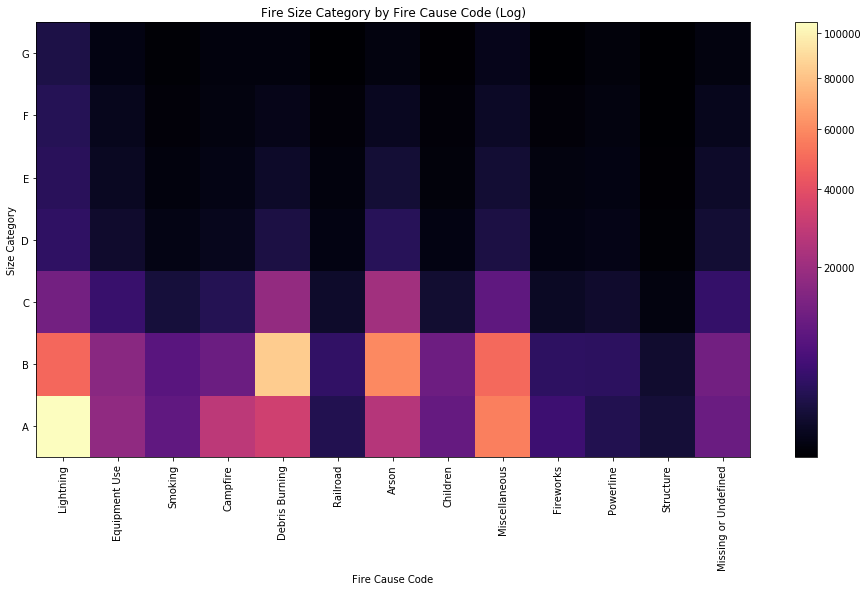

In [76]:
#Cause dict based off of the two columns for cause and cause desc:
#state_cause_dict = {9.0: 'Miscellaneous',
# 1.0: 'Lightning',
# 5.0: 'Debris Burning',
# 4.0: 'Campfire',
# 2.0: 'Equipment Use',
# 7.0: 'Arson',
# 8.0: 'Children',
# 6.0: 'Railroad',
# 3.0: 'Smoking',
# 11.0: 'Powerline',
# 12.0: 'Structure',
# 10.0: 'Fireworks',
# 13.0: 'Missing/Undefined'}
fig, ax = plt.subplots(figsize=(16,8))
plt.set_cmap('magma')
import matplotlib.colors as mcolors
gamma = 0.5
X1_train_feat = np.array(X1_train['STAT_CAUSE_CODE'])
h = plt.hist2d(X1_train_feat, y1_train, norm=mcolors.PowerNorm(gamma), bins=[np.arange(1, 15), np.arange(1,9)])
cause_list = ['Lightning', 'Equipment Use', 'Smoking', 'Campfire', 'Debris Burning',
              'Railroad', 'Arson', 'Children', 'Miscellaneous', 'Fireworks', 'Powerline',
             'Structure', 'Missing or Undefined']

plt.title("Fire Size Category by Fire Cause Code (Log)")
plt.xlabel("Fire Cause Code")
plt.ylabel('Size Category')
plt.xticks(np.arange(1,14) + .5, cause_list, rotation=90);
plt.yticks(np.arange(1, 8) + .5, ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

fig.colorbar(h[3], ax=ax)


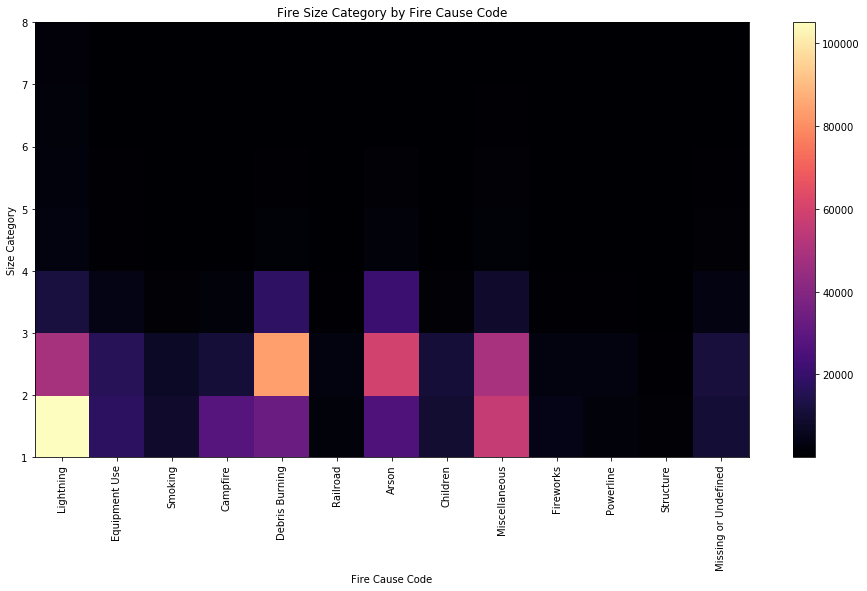

In [73]:
fig, ax = plt.subplots(figsize=(16,8))
plt.set_cmap('magma')
import matplotlib.colors as mcolors

X1_train_feat = np.array(X1_train['STAT_CAUSE_CODE'])
h = plt.hist2d(X1_train_feat, y1_train, bins=[np.arange(1, 15), np.arange(1,9)])
cause_list = ['Lightning', 'Equipment Use', 'Smoking', 'Campfire', 'Debris Burning',
              'Railroad', 'Arson', 'Children', 'Miscellaneous', 'Fireworks', 'Powerline',
             'Structure', 'Missing or Undefined']

plt.title("Fire Size Category by Fire Cause Code")
plt.xlabel("Fire Cause Code")
plt.ylabel('Size Category')
plt.xticks(np.arange(1,14) + .5, cause_list, rotation=90);
plt.yticks(np.arange(1, 8), ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

fig.colorbar(h[3], ax=ax)

In [58]:
import seaborn as sns

ValueError: Could not interpret input 'size'